In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import dates

## Candlestick

In [17]:
df_raw = yf.download('SPY AAPL', start='2000-01-01', end='2022-12-31')

[*********************100%***********************]  2 of 2 completed


In [18]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]   ## Get the first column multi-index 
    df.columns = outer                    ## Replace columns with the first index
    return df

(df_raw
 .iloc[:,0::2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2000-01-03,0.849469,0.999442,1.004464,0.907924,0.936384,535796800
2000-01-04,0.777850,0.915179,0.987723,0.903460,0.966518,512377600
2000-01-05,0.789232,0.928571,0.987165,0.919643,0.926339,778321600
2000-01-06,0.720933,0.848214,0.955357,0.848214,0.947545,767972800
2000-01-07,0.755083,0.888393,0.901786,0.852679,0.861607,460734400
...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,125.674019,126.040001,131.029999,125.870003,129.669998,85438400


In [19]:
df = (df_raw
      .iloc[:,0::2]
      .pipe(fix_cols)
      .loc['2019':'2019']
)
display(df.head(), df.tail())

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-01-02,37.994492,39.480000,39.712502,38.557499,38.722500,148158800
2019-01-03,34.209961,35.547501,36.430000,35.500000,35.994999,365248800
2019-01-04,35.670353,37.064999,37.137501,35.950001,36.132500,234428400
2019-01-07,35.590961,36.982498,37.207500,36.474998,37.174999,219111200
2019-01-08,36.269444,37.687500,37.955002,37.130001,37.389999,164101200


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-12-24,69.421074,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.798416,72.477501,72.495003,71.175003,71.205002,93121200
2019-12-27,70.771545,72.449997,73.492500,72.029999,72.779999,146266000
2019-12-30,71.191582,72.879997,73.172501,71.305000,72.364998,144114400
2019-12-31,71.711754,73.412498,73.419998,72.379997,72.482498,100805600


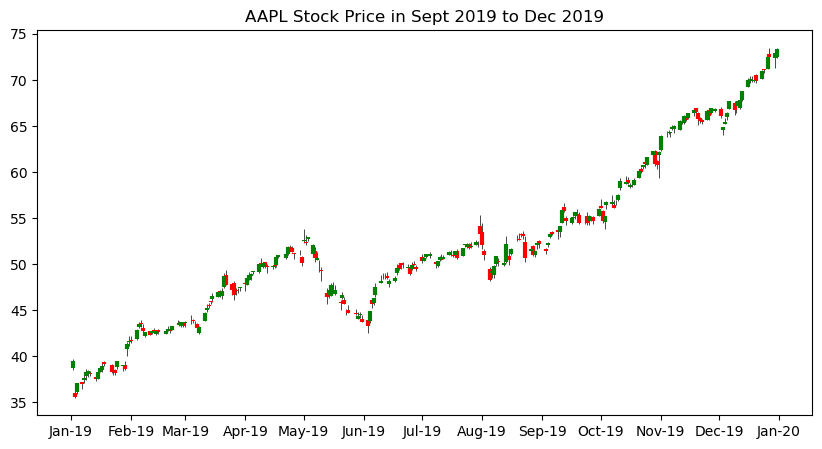

In [20]:
def lines_for_candle(_ax, _df, low, high, width, color):
    _ax.vlines(_df.index, 
               ymin = _df[low], ymax=_df[high], 
               colors=color, linewidth=width)
    
## Create fix and ax
fix, ax = plt.subplots(figsize = (10,5))

lines_for_candle(ax, df,'Low','High',.5, 'k')

red = df.query('Open > Close')
lines_for_candle(ax, red,'Open','Close',3, 'r')

green = df.query('Open <= Close')
lines_for_candle(ax, green,'Open','Close',3, 'g')

## XAXIS
ax.xaxis.set_major_locator(dates.MonthLocator())           ## Mark the months as major
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y')) ## Format the dates by Mon - Year
# ax.xaxis.set_minor_locator(dates.DayLocator())             ## Minor locator adds ticks for the lines (smaller)

ax.set_title('AAPL Stock Price in Sept 2019 to Dec 2019');

## Volatility
Plot the rolling volatility over 30-day sliding windows for 2015-2019

In [21]:
df_raw

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2000-01-03    0.849469   94.946472    0.999442  145.437500    1.004464   
2000-01-04    0.777850   91.233452    0.915179  139.750000    0.987723   
2000-01-05    0.789232   91.396675    0.928571  140.000000    0.987165   
2000-01-06    0.720933   89.927757    0.848214  137.750000    0.955357   
2000-01-07    0.755083   95.150475    0.888393  145.750000    0.901786   
...                ...         ...         ...         ...         ...   
2022-12-23  131.477127  381.454193  131.860001  382.910004  132.419998   
2022-12-27  129.652435  379.949921  130.029999  381.399994  131.410004   
2022-12-28  125.674019  375.227936  126.040001  376.660004  131.029999   
2022-12-29  129.233658  381.982178  129.610001  383.440002  130.479996   
2022-12-30  129.552719  380.975983  129.929993  382.429993  129.949997   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2000-01-03  148.250000    0.907924  143.875000    0.936384  148.250000   
2000-01-04  144.062500    0.903460  139.640625    0.966518  143.531250   
2000-01-05  141.531250    0.919643  137.250000    0.926339  139.937500   
2000-01-06  141.500000    0.848214  137.750000    0.947545  139.625000   
2000-01-07  145.750000    0.852679  140.062500    0.861607  140.312500   
...                ...         ...         ...         ...         ...   
2022-12-23  383.059998  129.639999  378.029999  130.919998  379.649994   
2022-12-27  383.149994  128.720001  379.649994  131.380005  382.790009   
2022-12-28  383.390015  125.870003  376.420013  129.669998  381.329987   
2022-12-29  384.350006  127.730003  379.079987  127.989998  379.630005   
2022-12-30  382.579987  127.430000  378.429993  128.410004  380.640015   

               Volume            
                 AAPL       SPY  
Date                             
2000-01-03  535796800   8164300  
2000-01-04  512377600   8089800  
2000-01-05  778321600  12177900  
2000-01-06  767972800   6227200  
2000-01-07  460734400   8066500  
...               ...       ...  
2022-12-23   63814900  59857300  
2022-12-27   69007800  51638200  
2022-12-28   85438400  70911500  
2022-12-29   75703700  66970900  
2022-12-30   77034200  84022200  

[5787 rows x 12 columns]

<Axes: xlabel='Date'>

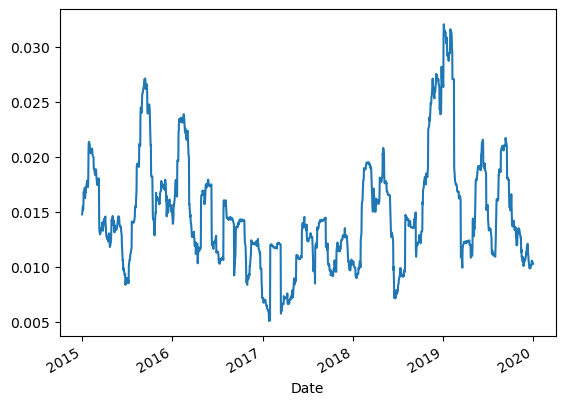

In [22]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]   ## Get the first column index 
    df.columns = outer                    ## Replace columns with the first index
    return df


df = (df_raw
      .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
      .pipe(fix_cols)  ## Rename columns using the function above
      .assign(
          close_pct_change = lambda df: df.Close.pct_change()
      )
      .rolling(30, min_periods=30)
      .close_pct_change
      .std()
      .loc['2015':'2019']    ## Filter index (not necessary here since I filtered when reading data
      .plot()
)

df

## Exponential Moving Average

In [23]:
df_raw

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2000-01-03    0.849469   94.946472    0.999442  145.437500    1.004464   
2000-01-04    0.777850   91.233452    0.915179  139.750000    0.987723   
2000-01-05    0.789232   91.396675    0.928571  140.000000    0.987165   
2000-01-06    0.720933   89.927757    0.848214  137.750000    0.955357   
2000-01-07    0.755083   95.150475    0.888393  145.750000    0.901786   
...                ...         ...         ...         ...         ...   
2022-12-23  131.477127  381.454193  131.860001  382.910004  132.419998   
2022-12-27  129.652435  379.949921  130.029999  381.399994  131.410004   
2022-12-28  125.674019  375.227936  126.040001  376.660004  131.029999   
2022-12-29  129.233658  381.982178  129.610001  383.440002  130.479996   
2022-12-30  129.552719  380.975983  129.929993  382.429993  129.949997   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2000-01-03  148.250000    0.907924  143.875000    0.936384  148.250000   
2000-01-04  144.062500    0.903460  139.640625    0.966518  143.531250   
2000-01-05  141.531250    0.919643  137.250000    0.926339  139.937500   
2000-01-06  141.500000    0.848214  137.750000    0.947545  139.625000   
2000-01-07  145.750000    0.852679  140.062500    0.861607  140.312500   
...                ...         ...         ...         ...         ...   
2022-12-23  383.059998  129.639999  378.029999  130.919998  379.649994   
2022-12-27  383.149994  128.720001  379.649994  131.380005  382.790009   
2022-12-28  383.390015  125.870003  376.420013  129.669998  381.329987   
2022-12-29  384.350006  127.730003  379.079987  127.989998  379.630005   
2022-12-30  382.579987  127.430000  378.429993  128.410004  380.640015   

               Volume            
                 AAPL       SPY  
Date                             
2000-01-03  535796800   8164300  
2000-01-04  512377600   8089800  
2000-01-05  778321600  12177900  
2000-01-06  767972800   6227200  
2000-01-07  460734400   8066500  
...               ...       ...  
2022-12-23   63814900  59857300  
2022-12-27   69007800  51638200  
2022-12-28   85438400  70911500  
2022-12-29   75703700  66970900  
2022-12-30   77034200  84022200  

[5787 rows x 12 columns]

In [25]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]   ## Get the first column index 
    df.columns = outer                    ## Replace columns with the first index
    return df

df = (df_raw
      .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
      .pipe(fix_cols)  ## Rename columns using the function above
      .assign(
          close_ema_1 = lambda df: df.Close.ewm(alpha=.0392).mean(),
          close_ema_2 = lambda df: df.Close.ewm(alpha=.00995).mean()
      )
      .loc['2015':'2015',['Close','close_ema_1', 'close_ema_2']]
     )

df

,Close,close_ema_1,close_ema_2
Date,,,
2015-01-02,27.332500,27.602261,24.658231
2015-01-05,26.562500,27.561502,24.677178
2015-01-06,26.565001,27.522439,24.695962
2015-01-07,26.937500,27.499510,24.718265
2015-01-08,27.972500,27.518051,24.750645
...,...,...,...
2015-12-24,27.007500,28.539271,29.023180
2015-12-28,26.705000,28.467367,29.000114
2015-12-29,27.184999,28.417098,28.982054


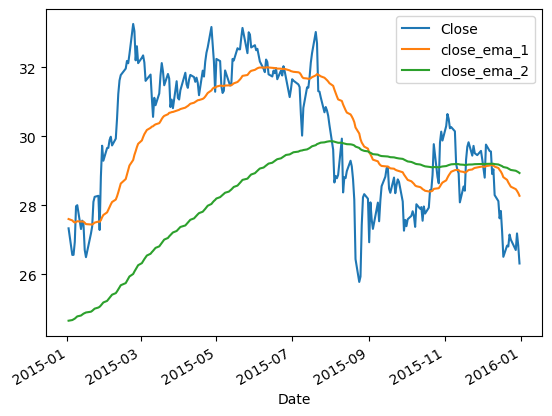

In [26]:
df = (df_raw
      .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
      .pipe(fix_cols)  ## Rename columns using the function above
      .assign(
          close_ema_1 = lambda df: df.Close.ewm(alpha=.0392).mean(),
          close_ema_2 = lambda df: df.Close.ewm(alpha=.00995).mean()
      )
      .loc['2015':'2015',['Close','close_ema_1', 'close_ema_2']]
      .plot()
     )

## RSI
Relative Strength Income (RSI) Column

- \> 70 overbought
- < 30 oversold

$ RSI = 100 - \frac{100}{1 + RS} $

Where RS is the relative strength, calculated as:

$ RS = \frac{AverageGain}{AverageLoss} $

Where AverageN means:
- Average of first 14 values for first value
- (Previous Average * 13 + current N) / 14

Test logic on example solution spreadsheet

In [72]:
import io

data = '''
Date	QQQQ Close	Change	Gain	Loss 	Avg Gain	Avg Loss	RS	14-day RSI
14-Dec-09	44.34							
15-Dec-09	44.09	-0.25		0.25				
16-Dec-09	44.15	0.06	0.06					
17-Dec-09	43.61	-0.54		0.54				
18-Dec-09	44.33	0.72	0.72					
21-Dec-09	44.83	0.50	0.50					
22-Dec-09	45.10	0.27	0.27					
23-Dec-09	45.42	0.33	0.33					
24-Dec-09	45.84	0.42	0.42					
28-Dec-09	46.08	0.24	0.24					
29-Dec-09	45.89	-0.19		0.19				
30-Dec-09	46.03	0.14	0.14					
31-Dec-09	45.61	-0.42		0.42				
4-Jan-10	46.28	0.67	0.67				RS	RSI
5-Jan-10	46.28				0.24	0.10	2.39	70.53
6-Jan-10	46.00	-0.28		0.28	0.22	0.11	1.97	66.32
7-Jan-10	46.03	0.03	0.03		0.21	0.10	1.99	66.55
8-Jan-10	46.41	0.38	0.38		0.22	0.10	2.27	69.41
11-Jan-10	46.22	-0.19		0.19	0.20	0.10	1.97	66.36
12-Jan-10	45.64	-0.58		0.58	0.19	0.14	1.38	57.97
13-Jan-10	46.21	0.57	0.57		0.22	0.13	1.70	62.93
14-Jan-10	46.25	0.04	0.04		0.20	0.12	1.72	63.26
15-Jan-10	45.71	-0.54		0.54	0.19	0.15	1.28	56.06
19-Jan-10	46.45	0.74	0.74		0.23	0.14	1.66	62.38
20-Jan-10	45.78	-0.67		0.67	0.21	0.18	1.21	54.71
21-Jan-10	45.35	-0.43		0.43	0.20	0.19	1.02	50.42
22-Jan-10	44.03	-1.33		1.33	0.18	0.27	0.67	39.99
25-Jan-10	44.18	0.15	0.15		0.18	0.26	0.71	41.46
26-Jan-10	44.22	0.04	0.04		0.17	0.24	0.72	41.87
27-Jan-10	44.57	0.35	0.35		0.18	0.22	0.83	45.46
28-Jan-10	43.42	-1.15		1.15	0.17	0.29	0.59	37.30
29-Jan-10	42.66	-0.76		0.76	0.16	0.32	0.49	33.08
1-Feb-10	43.13	0.47	0.47		0.18	0.30	0.61	37.77
'''

qqq = (pd.read_table(io.StringIO(data), sep = '\t', parse_dates=['Date']))
qqq

,Date,QQQQ Close,Change,Gain,Loss,Avg Gain,Avg Loss,RS,14-day RSI
0,2009-12-14,44.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-12-15,44.09,-0.25,NaN,0.25,NaN,NaN,NaN,NaN
2,2009-12-16,44.15,0.06,0.06,NaN,NaN,NaN,NaN,NaN
3,2009-12-17,43.61,-0.54,NaN,0.54,NaN,NaN,NaN,NaN
4,2009-12-18,44.33,0.72,0.72,NaN,NaN,NaN,NaN,NaN
5,2009-12-21,44.83,0.50,0.50,NaN,NaN,NaN,NaN,NaN
6,2009-12-22,45.10,0.27,0.27,NaN,NaN,NaN,NaN,NaN
7,2009-12-23,45.42,0.33,0.33,NaN,NaN,NaN,NaN,NaN
8,2009-12-24,45.84,0.42,0.42,NaN,NaN,NaN,NaN,NaN
9,2009-12-28,46.08,0.24,0.24,NaN,NaN,NaN,NaN,NaN


In [81]:
(qqq
 .loc[:,['QQQQ Close']]
 .assign(
     change = qqq['QQQQ Close'].diff(),                 ## Subtract previous value
     gain = lambda _df : _df.change.clip(lower = 0),    ## If the value is lower than 0 make 0, if higher leave as is
     loss = lambda _df : _df.change.clip(upper = 0)     ## If the value is high than 0 make 0, if higher leave as is
 )
)

,QQQQ Close,change,gain,loss
0,44.34,NaN,NaN,NaN
1,44.09,-0.25,0.00,-0.25
2,44.15,0.06,0.06,0.00
3,43.61,-0.54,0.00,-0.54
4,44.33,0.72,0.72,0.00
5,44.83,0.50,0.50,0.00
6,45.10,0.27,0.27,0.00
7,45.42,0.32,0.32,0.00
8,45.84,0.42,0.42,0.00
9,46.08,0.24,0.24,0.00


In [95]:
def avg(df, col, window_size = 14):
    results = []
    window = []
    
    for index, value in enumerate(df[col]):      ## Loop over each row in the series
        window.append(value)                     ## Append values to window list variable
        if index < (window_size):                ## If index is less than 14 (window size) append nans
            results.append(np.nan)
        elif index == (window_size):             
            window.pop(0)                                 ## Remove the first nan value 
            results.append(sum(window)/window_size)         
        else: 
            results.append((results[-1] * (window_size-1) + value) / window_size)
    return pd.Series(results, index = df.index)

In [108]:
(qqq
 .loc[:,['QQQQ Close']]
 .assign(
     change = qqq['QQQQ Close'].diff(),                 ## Subtract previous value
     gain = lambda _df : _df.change.clip(lower = 0),    ## If the value is lower than 0 make 0, if higher leave as is
     loss = lambda _df : _df.change.clip(upper = 0),    ## If the value is high than 0 make 0, if higher leave as is
     avg_gain = lambda _df : avg(_df, col = 'gain'),
     avg_loss = lambda _df : -avg(_df, col = 'loss'),
     rs = lambda _df : _df.avg_gain / _df.avg_loss,
     rsi = lambda _df : np.select([_df.avg_loss == 0], [100], (100 - (100/(1 + _df.rs))))
 )
)

,QQQQ Close,change,gain,loss,avg_gain,avg_loss,rs,rsi
0,44.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44.09,-0.25,0.00,-0.25,NaN,NaN,NaN,NaN
2,44.15,0.06,0.06,0.00,NaN,NaN,NaN,NaN
3,43.61,-0.54,0.00,-0.54,NaN,NaN,NaN,NaN
4,44.33,0.72,0.72,0.00,NaN,NaN,NaN,NaN
5,44.83,0.50,0.50,0.00,NaN,NaN,NaN,NaN
6,45.10,0.27,0.27,0.00,NaN,NaN,NaN,NaN
7,45.42,0.32,0.32,0.00,NaN,NaN,NaN,NaN
8,45.84,0.42,0.42,0.00,NaN,NaN,NaN,NaN
9,46.08,0.24,0.24,0.00,NaN,NaN,NaN,NaN
